In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from pandas import get_dummies
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from timeit import default_timer as timer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import kneighbors_graph
import matplotlib

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
a = pd.get_dummies(dataset['sex'], prefix = "sex")
b = pd.get_dummies(dataset['cp'], prefix = "cp")
c = pd.get_dummies(dataset['fbs'], prefix = "fbs")
d = pd.get_dummies(dataset['restecg'], prefix = "restecg")
e = pd.get_dummies(dataset['exang'], prefix = "exang")
f = pd.get_dummies(dataset['slope'], prefix = "slope")
g = pd.get_dummies(dataset['ca'], prefix = "ca")
h = pd.get_dummies(dataset['thal'], prefix = "thal")


frames = [dataset, a, b, c, d, e, f, g, h]


dataset2 = pd.concat(frames, axis = 1)


dataset2 = dataset2.drop(columns = ['sex','cp', 'fbs', 'restecg',
                                  'exang','slope','ca','thal'])

In [4]:
y = dataset2["target"]
X = dataset2.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 84  14]
 [  6 101]]


Accuracy of Logistic Regression: 90.2439024390244 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        98
           1       0.88      0.94      0.91       107

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [49]:
DT = DecisionTreeClassifier(max_depth=5)

model = DT.fit(X_train, y_train)
lr_predict = DT.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 79  19]
 [  6 101]]


Accuracy of Logistic Regression: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        98
           1       0.84      0.94      0.89       107

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



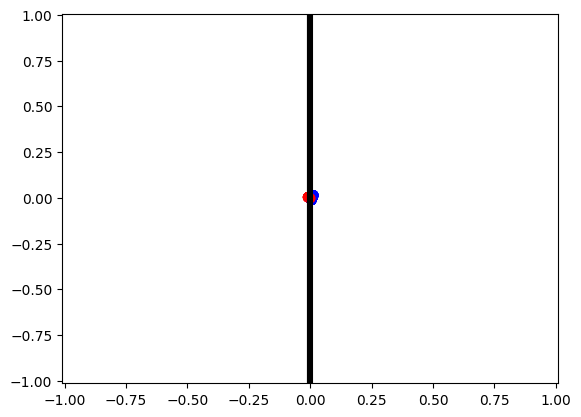

In [14]:
h = .02  # step size in the mesh
x_min, x_max = X_CE[:,0].min() - 1, X_CE[:,0].max() + 1
y_min, y_max = X_CE[:,1].min() - 1,X_CE[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

fig = plt.figure()
    
colors = ['red','blue']
plt.scatter(X_CE[:,0],X_CE[:,1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black')



{'affinity': 'nearest_neighbors',
 'eigen_solver': 'arpack',
 'eigen_tol': 'auto',
 'gamma': None,
 'n_components': 2,
 'n_jobs': None,
 'n_neighbors': 30,
 'random_state': None}

confussion matrix
[[337  64]
 [ 81 338]]


Accuracy of Logistic Regression: 82.3170731707317 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       401
           1       0.84      0.81      0.82       419

    accuracy                           0.82       820
   macro avg       0.82      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820



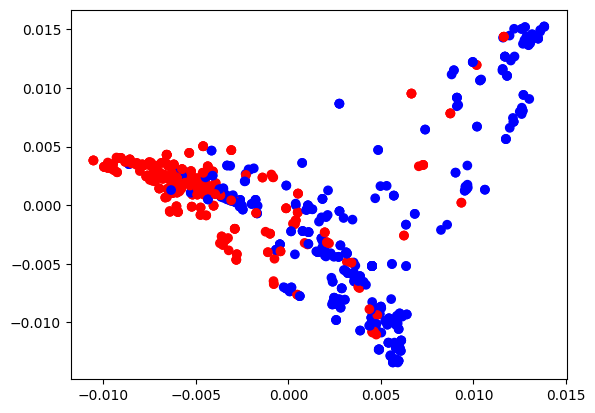

In [17]:
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=30, eigen_solver='arpack')
X_CE = embedding.fit_transform(X_train)
colors = ['red','blue']
plt.scatter(X_CE[:,0],X_CE[:,1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
lr = LogisticRegression(max_iter=10000, penalty='l1', C=1.6, solver= 'liblinear' )
model_spectral = lr.fit(X_CE, y_train)
lr_predict = lr.predict(X_CE)
#lr_predict = lr_spectral.predict(embedding.fit_transform(X_test))
lr_conf_matrix = confusion_matrix(y_train, lr_predict)
lr_acc_score = accuracy_score(y_train, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_train,lr_predict))

In [11]:
logistic = LogisticRegression()
pipe = Pipeline(steps=[("logistic", logistic)])

param_grid = [
    {'logistic__penalty' : ['l1', 'l2'],
    'logistic__C' : np.logspace(-4, 4, 20),
    'logistic__solver' : ['liblinear']},]
    
search = GridSearchCV(pipe, param_grid, scoring='accuracy', n_jobs=2)
search.fit(X_CE, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'])


Best parameter (CV score=0.823):
{'logistic__C': 1.623776739188721, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
[0.48902439 0.51097561 0.48902439 0.51097561 0.48902439 0.51097561
 0.48902439 0.51097561 0.48902439 0.51097561 0.48902439 0.51097561
 0.48902439 0.51097561 0.48902439 0.51097561 0.51097561 0.51097561
 0.51097561 0.51097561 0.82317073 0.51097561 0.82073171 0.6304878
 0.81463415 0.81341463 0.81219512 0.80853659 0.8097561  0.81341463
 0.8097561  0.8097561  0.8097561  0.80853659 0.8097561  0.80853659
 0.8097561  0.80853659 0.8097561  0.8097561 ]


confussion matrix
[[354  47]
 [ 24 395]]


Accuracy of Logistic Regression: 91.34146341463415 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       401
           1       0.89      0.94      0.92       419

    accuracy                           0.91       820
   macro avg       0.92      0.91      0.91       820
weighted avg       0.91      0.91      0.91       820



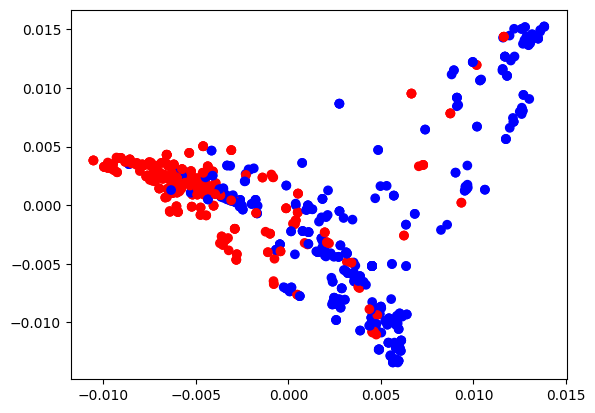

In [6]:
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=30, eigen_solver='arpack')
X_CE = embedding.fit_transform(X_train)
colors = ['red','blue']
plt.scatter(X_CE[:,0],X_CE[:,1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

DT = DecisionTreeClassifier(max_depth=5)
model_spectral = DT.fit(X_CE, y_train)
lr_predict = DT.predict(X_CE)
#lr_predict = lr_spectral.predict(embedding.fit_transform(X_test))
lr_conf_matrix = confusion_matrix(y_train, lr_predict)
lr_acc_score = accuracy_score(y_train, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_train,lr_predict))


In [ ]:
y = dataset2["target"]
X = dataset2.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

*************** PCA Summary ***************
No. of features:  30
No. of samples:  820
No. of components:  2
Explained variance ratio:  [0.74906656 0.14995881]


/nvme-home/cobileanv/Work/CMSC_635/CMSC635Project/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


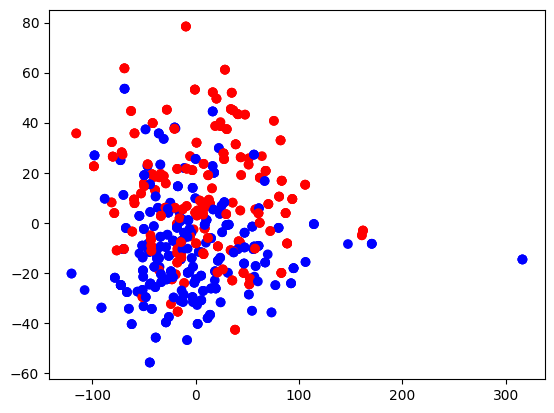

In [30]:
y = dataset2["target"]
X = dataset2.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

pca = PCA(n_components=2)
X_train_PCA=pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
plt.scatter(X_train_PCA[:,0],X_train_PCA[:,1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)


99.8


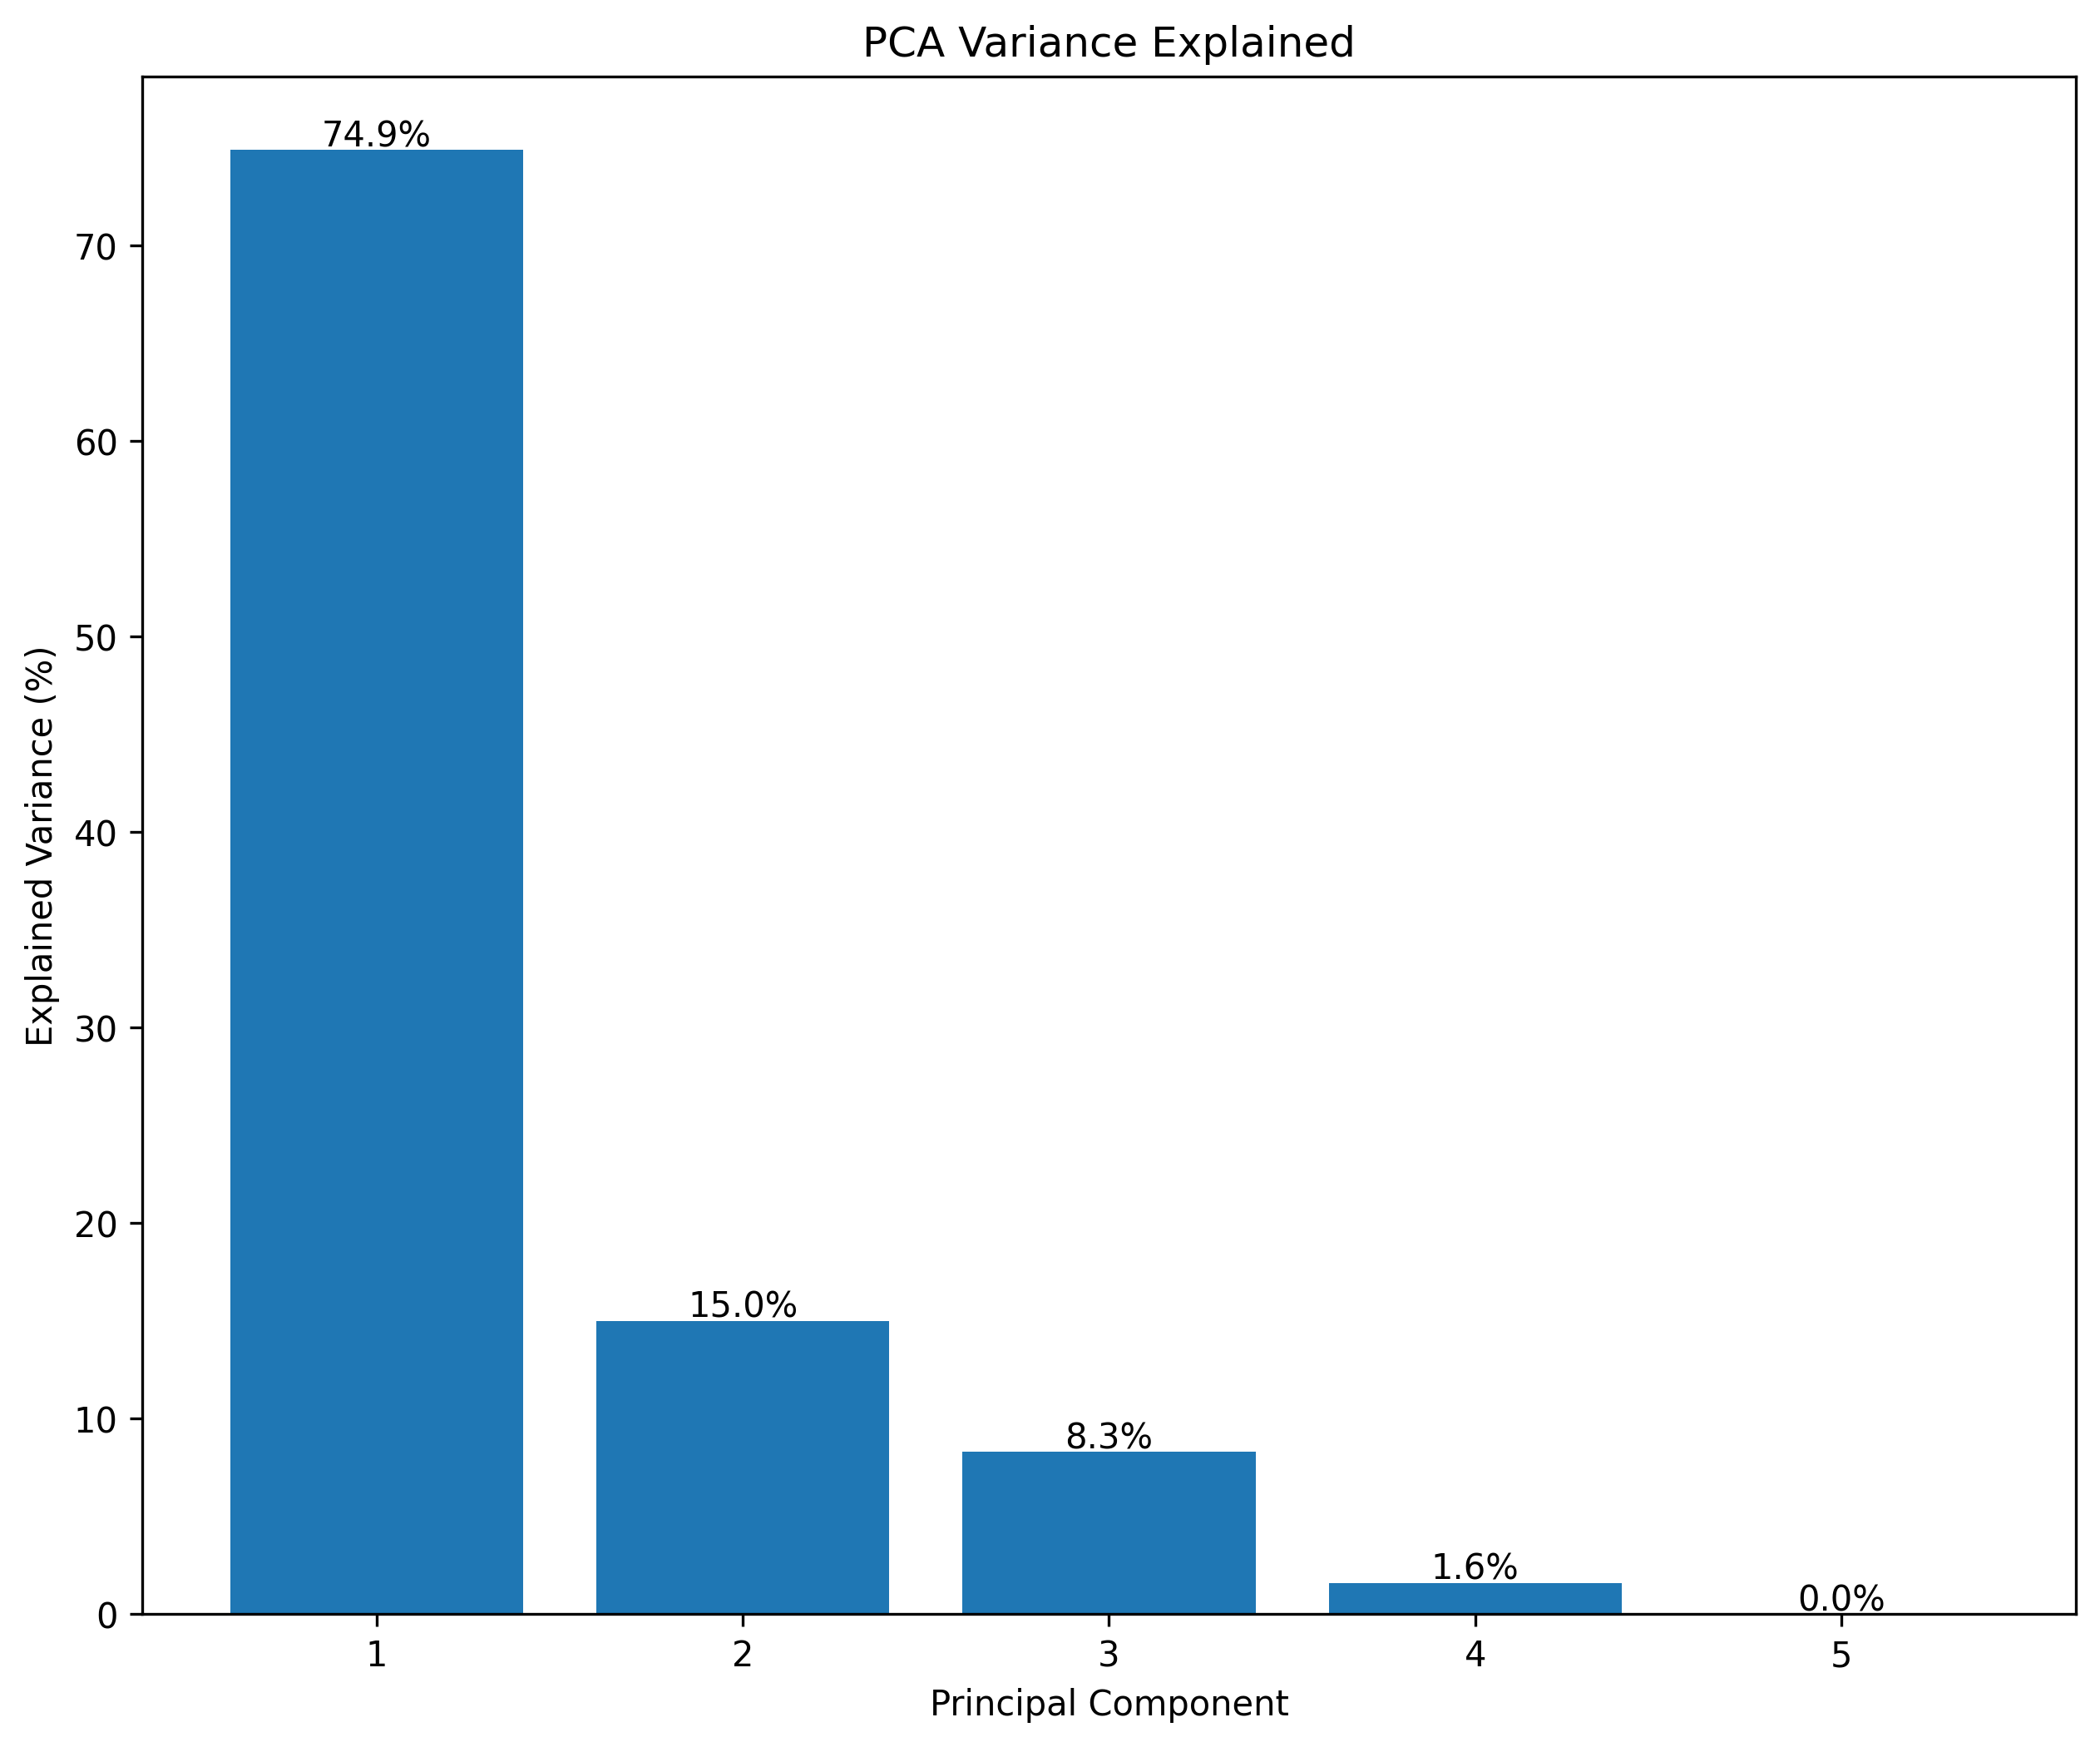

In [9]:
#x_ax=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
#     'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
x_ax = list(range(1,len(pca.explained_variance_ratio_)+1))
y_ax=pca.explained_variance_ratio_.round(3)*100
print(sum(pca.explained_variance_ratio_.round(3)*100))
# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax)

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i+1,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

In [10]:
lr_pca = LogisticRegression()
start = timer()
model = lr_pca.fit(X_train_PCA, y_train)
end = timer()
print(end - start)
lr_predict = lr_pca.predict(X_test_PCA)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[75 23]
 [17 90]]


Accuracy of Logistic Regression: 80.48780487804879 

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        98
           1       0.80      0.84      0.82       107

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [13]:
DT_pca = DecisionTreeClassifier(max_depth=5)
start = timer()
model = DT_pca.fit(X_train_PCA, y_train)
end = timer()
print(end - start)
DT_predict = DT_pca.predict(X_test_PCA)
DT_conf_matrix = confusion_matrix(y_test, DT_predict)
DT_acc_score = accuracy_score(y_test, DT_predict)
print("confussion matrix")
print(DT_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",DT_acc_score*100,'\n')
print(classification_report(y_test,DT_predict))

0.006888003088533878
confussion matrix
[[81 17]
 [16 91]]


Accuracy of Logistic Regression: 83.90243902439025 

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        98
           1       0.84      0.85      0.85       107

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



Best parameter (CV score=0.860):
{'pca__n_components': 20}
[0.82804878 0.83414634 0.83780488 0.84146341 0.84756098 0.8597561
 0.8597561  0.8597561 ]
confussion matrix
[[84 14]
 [ 8 99]]


Accuracy of Logistic Regression: 89.26829268292683 

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        98
           1       0.88      0.93      0.90       107

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



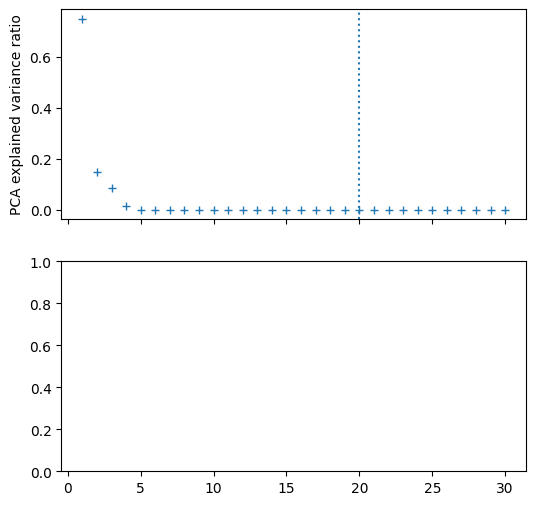

In [23]:
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [3, 5, 7, 10, 15, 20, 25, 30],
}
search = GridSearchCV(pipe, param_grid, scoring='accuracy', n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'])
print("confussion matrix")
print(DT_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",DT_acc_score*100,'\n')
print(classification_report(y_test,DT_predict))

DT_predict = search.predict(X_test)
DT_conf_matrix = confusion_matrix(y_test, DT_predict)
DT_acc_score = accuracy_score(y_test, DT_predict)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",)


In [8]:
df2 = pd.read_excel('CTG.xls', sheet_name = 'Raw Data')
df2=df2.drop(["FileName","Date","SegFile","b","e","CLASS"],axis=1)
df2.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,B,C,D,E,AD,DE,LD,FS,SUSP,NSP
0,120,120,0,0,0,73,0.5,43,2.4,0,...,0,0,0,0,0,0,0,1,0,2
1,132,132,4,0,4,17,2.1,0,10.4,2,...,0,0,0,0,1,0,0,0,0,1
2,133,133,2,0,5,16,2.1,0,13.4,2,...,0,0,0,0,1,0,0,0,0,1
3,134,134,2,0,6,16,2.4,0,23.0,2,...,0,0,0,0,1,0,0,0,0,1
4,132,132,4,0,5,16,2.4,0,19.9,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
y = df2["NSP"]
X = df2.drop("NSP",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[322   4   0]
 [  5  53   0]
 [  0   0  42]]


Accuracy of Logistic Regression: 97.88732394366197 

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       326
           2       0.93      0.91      0.92        58
           3       1.00      1.00      1.00        42

    accuracy                           0.98       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426



In [12]:
DT = DecisionTreeClassifier(max_depth=5)
model = DT.fit(X_train, y_train)
lr_predict = DT.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[325   1   0]
 [  8  50   0]
 [  0   0  42]]


Accuracy of Logistic Regression: 97.88732394366197 

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       326
           2       0.98      0.86      0.92        58
           3       1.00      1.00      1.00        42

    accuracy                           0.98       426
   macro avg       0.99      0.95      0.97       426
weighted avg       0.98      0.98      0.98       426



In [30]:
y = df2["NSP"]
X = df2.drop("NSP",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

pca = PCA(n_components=0.95)
X_train_PCA=pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)


*************** PCA Summary ***************
No. of features:  33
No. of samples:  1700
No. of components:  6
Explained variance ratio:  [0.47491757 0.18566115 0.13206429 0.07697583 0.05653905 0.02989706]


/nvme-home/cobileanv/Work/CMSC_635/CMSC635Project/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [1]:
!pip install scikit-network

     |████████████████████████████████| 7.3 MB 3.8 MB/s eta 0:00:01


In [2]:
from sknetwork.embedding import Spectral

In [ ]:
spectral = Spectral(n_components=3)

adjacency_vector = spectral.fit(adjacency)
len(spectral.predict(adjacency_vector))